# **1. Problem Statement**


Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 

These details are: 
1. Gender
2. Marital Status 
3. Education 
4. Number of Dependents 
5. Income 
6. Loan Amount 
7. Credit History 

To automate this process, they have given a problem to identify the customers segments
Those are eligible for loan amount so that they can specifically target these customers. 

**The machine learning models used:**

1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Decision Tree
4. Random Forest
5. XGBClassifier

# 2. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')
sns.set()

# 3. Data Gathering and Reading

In [ ]:
#! pip install opendatasets
import opendatasets
dataset_url = 'https://www.kaggle.com/datasets/ninzaami/loan-predication'
opendatasets.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jumaleabdi
Your Kaggle Key: ··········


100%|██████████| 7.83k/7.83k [00:00<00:00, 4.57MB/s]

In [ ]:
# read csv file using pandas
data_path = '/content/loan-predication/train_u6lujuX_CVtuZ9i (1).csv'
loan_dataset = pd.read_csv(data_path)
# read first five rows
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# shape of the dataset
loan_dataset.shape
# 614 ---> rows
# 13 -----> columns

(614, 13)

In [ ]:
# names of the columns in the dataset
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Data types in the dataset**

In [ ]:
loan_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Check for categorical columns and numerical columns**

In [ ]:
categorical_columns = loan_dataset.select_dtypes('object').columns.to_list()
numerical_columns = loan_dataset.select_dtypes(['int64','float64']).columns.to_list()

In [ ]:
# categorical_columns
categorical_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Categorical_columns**
1. Loan_ID
2. Gender
3. Married
4. Dependents
5. Education
6. Self_Employed
7. Property_Area
8. Loan_Status


In [ ]:
# numerical columns
numerical_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

**Numerical_Columns**

1. ApplicantIncome
2. CoapplicantIncome
3. LoanAmount
4. Loan_Amount_Term
5. Credit_History


**Descriptive statistics**

In [ ]:
loan_dataset.describe() # for numerical columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_dataset.describe(include='object') # for categorical columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


**Top -->Mode** 

**freq --> The number of times the mode was observed**

# **4. Expolatory Data Analysis**

**4.1 categorical_columns visualization**

In [ ]:
categorical_columns.pop(0)
categorical_columns


['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
def categorical_plot(df,plot_kind,columns):
  plot_kind= plot_kind.lower()
  plot_function = {
      'countplot':sns.countplot,
      'pie':plt.pie,
      'violin':sns.violinplot,
      'boxplot':sns.boxplot,
      'histplot':sns.histplot
  }
  fig = plt.figure(figsize=(10,8))
  for index,column in enumerate(columns):
    axis = fig.add_subplot(3, 3, index + 1)
    if plot_kind == 'countplot':
       plot_function[plot_kind](df[column], ax=axis)
       plt.title(f'{plot_kind} for {column}')
    else:
      data = df[column].value_counts()
      label = data.index
      plot_function[plot_kind](data,labels =label,autopct ='%.f%%')
      plt.title(f'{plot_kind} plot for {column}')
  plt.tight_layout()
  plt.show()


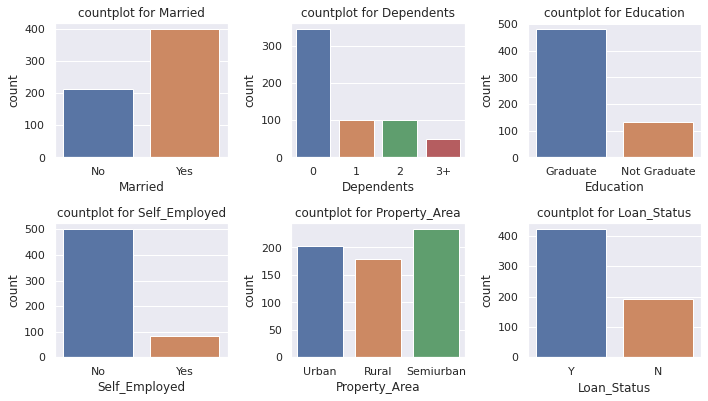

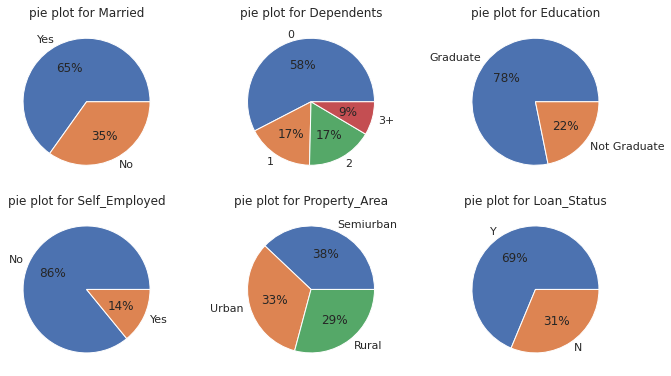

In [ ]:
plot_kind = ['countplot','pie']

for plot in plot_kind:
  categorical_plot(loan_dataset,plot,categorical_columns)

**4.2 Numerical_columns visualization**

In [ ]:
def numerical_plot(df,plot_kind,columns):
  plot_kind = plot_kind.lower()
  plot_function = {
      'violin':sns.violinplot,
        'boxplot':sns.boxplot,
        'histplot':sns.histplot 
  }
  fig = plt.figure(figsize=(8,3))
  for index,column in enumerate(columns):
    axis = fig.add_subplot(1, 3, index + 1)
    if plot_kind in ['violin','boxplot']:
      plot_function[plot_kind](y=df[column], ax=axis)
      plt.title(f'{plot_kind} for {column}')
    else:
      plot_function[plot_kind](df[column], ax=axis)

  plt.tight_layout()
  plt.show

  

In [ ]:
numerical_columns.pop(3)
numerical_columns.pop(4)
numerical_columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

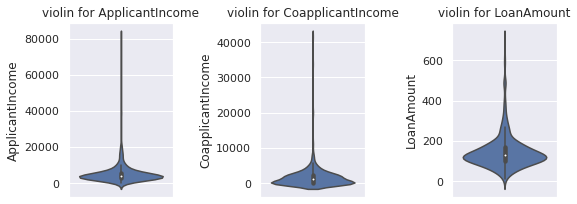

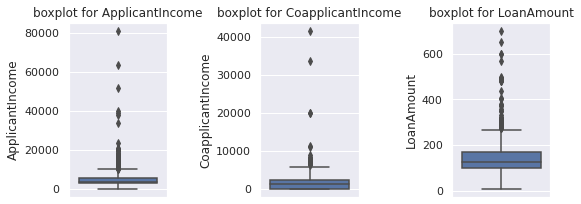

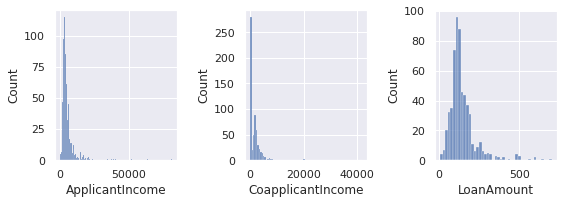

In [ ]:
  
plot_kind = ['violin','boxplot','histplot']
for plot in plot_kind:
  print('')
  numerical_plot(loan_dataset,plot,numerical_columns)
 

# **5. Data Preprocessing**

**5.1 Filling null Values**

**Categorical columns are filled with mode.**

**Numerical columns are filled with mean**

In [ ]:
loan_dataset.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
def fill_missing_values(df, columns):
    for column in columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    return df

columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
loan_dataset = fill_missing_values(loan_dataset, columns)


In [ ]:
loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean(),inplace=True)


In [ ]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# drop Loan_ID column because is not necessary
loan_dataset = loan_dataset.drop('Loan_ID',axis = 1)

**5.2 Label Encoding**

In [ ]:
labels_to_encode = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
copy = loan_dataset.copy()
copy2 = loan_dataset.copy()

def labelencoder(df,columns):
  encoder = LabelEncoder()
  for column in columns:
    df[column] = encoder.fit_transform(df[column])
  return df

new_dataset = labelencoder(loan_dataset,labels_to_encode)
new_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
new_dataset['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
new_dataset = loan_dataset.replace(to_replace= '3+', value=4)
copy = copy.replace(to_replace= '3+', value=4)

In [ ]:
new_dataset['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [ ]:
new_dataset['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

**5.3 Outliers Removal using Inter quaterline range**

In [ ]:

q1 = new_dataset.quantile(0.25)
q3 = new_dataset.quantile(0.75)
iqr = q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

new_dataset = new_dataset[~((new_dataset<lower_bound)| (new_dataset>upper_bound)).any(axis=1)]


In [ ]:
# seperate features and target
features = new_dataset.iloc[:,:-1]
target = new_dataset['Loan_Status']

In [ ]:
target.value_counts()

1    173
Name: Loan_Status, dtype: int64

**Distribution of target column**

**1--> 183**

**2--> 37**

Our dataset is imballance so we use **SMOTE** (Synthetic Minority Over-sampling Technique).

It is a resampling technique that creates new synthetic samples from the minority class rather than oversampling with replacement

In [ ]:
sm = SMOTE()
features,target = sm.fit_resample(features,target)

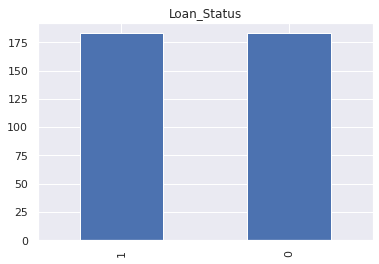

In [ ]:
target.value_counts().plot(kind='bar',title='Loan_Status')
# balanced data

**MINMAX SCALLING**

In [ ]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

**Train Test Split**

In [ ]:
train_data,test_data,train_labels,test_labels = train_test_split(features,target,test_size=0.2,random_state=0)

In [ ]:
print('Shape of Original dataset: ',features.shape)
print('Shape of Train dataset: ',train_data.shape)
print('Shape of Test dataset: ',test_data.shape)

Shape of Original dataset:  (366, 11)
Shape of Train dataset:  (292, 11)
Shape of Test dataset:  (74, 11)


# **6. Modeling**

**Base model Logistic Regression**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(train_data,train_labels)


LogisticRegression()

In [ ]:
# prediction on Testing data
log_prediction = log_reg.predict(test_data)


In [ ]:
# accuracy score
log_accuracy = accuracy_score(log_prediction,test_labels)
log_accuracy

0.527027027027027

In [ ]:
# confusion matrix
log_conf = confusion_matrix(log_prediction,test_labels)
log_conf

array([[20, 13],
       [16, 25]])

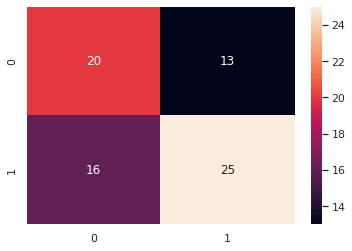

In [ ]:
# heatmap
sns.heatmap(log_conf,annot=True)
plt.show()

In [ ]:
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(n_estimators=25),XGBClassifier(),DecisionTreeClassifier(max_leaf_nodes=6)]
model_results = []
def best_model(model_list):
  for model in model_list:
    model.fit(train_data,train_labels)
    prediction = model.predict(test_data)
    accuracy = accuracy_score(prediction,test_labels)
    formated_answer = round(accuracy*100,2)
    model_results.append({
        'model Name':str(model),
        'Model Accuracy Score':formated_answer
    })
  return pd.DataFrame(model_results).sort_values(by='Model Accuracy Score',ascending=False)

    


best_model(models)




,model Name,Model Accuracy Score
3,RandomForestClassifier(n_estimators=25),77.03
5,DecisionTreeClassifier(max_leaf_nodes=6),66.22
4,XGBClassifier(),64.86
0,LogisticRegression(max_iter=1000),60.81
1,SVC(kernel='linear'),60.81
2,KNeighborsClassifier(),60.81
